In [140]:
#importing pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
#Reading the csv file 
df = pd.read_csv('C:/Users/v v/Desktop/tdi/python/week 4/Titanic Analysis.csv')

In [142]:
#previewing the first rows of the dataset
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [143]:
#creating a pandas series from an extracted column
df_col = df['fare']
df_col

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [144]:
#basic operations on extracted column "Fare"
df_col.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
1308 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [145]:
df_col.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [146]:
#checking for null
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [147]:
#Exploring the dataframe
#filling blanks in age
df_main = df
df_main['age'] = df_main['age'].fillna(0).astype(int)
#preview first few rows
df_main.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [148]:
#determine shape
df_main.shape

(1309, 14)

In [149]:
#summary statistics of the dataset
df_main.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,23.858671,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,17.593239,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [150]:
#creating new column
df_main['FamilySize'] = df_main['sibsp'] + df_main['parch']

In [151]:
df_main.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3


In [152]:
#creating the survived category
bin = [-0.5, 0.5, 1.5]
df_main['Survived_Label'] = pd.cut(df_main['survived'], bins=bin, labels=['Not Survived', 'Survived'], right=False)
df_main.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,Survived
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,Survived


In [153]:
#creating the class category
bin = [0, 1, 2, 3]
df_main['Pclass_Label'] = pd.cut(df_main['pclass'], bins=bin, labels=['1st class', '2nd class', '3rd class'], right=True)
df_main.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label,Pclass_Label
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,Survived,1st class
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,Survived,1st class


In [154]:
#creating the Age category
bin = [0, 15, 25, 30, 50, 82]
df_main['Age_Label'] = pd.cut(df_main['age'], bins=bin, labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Old'], right=False)
df_main.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label,Pclass_Label,Age_Label
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,Survived,1st class,Young Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,Survived,1st class,Child


In [155]:
#checking null values again
df_main.isna().sum()

pclass               0
survived             0
name                 0
sex                  0
age                  0
sibsp                0
parch                0
ticket               0
fare                 1
cabin             1014
embarked             2
boat               823
body              1188
home.dest          564
FamilySize           0
Survived_Label       0
Pclass_Label         0
Age_Label            0
dtype: int64

In [156]:
#filling up null fields
df_main['fare'] = df_main['fare'].fillna(0)
df_main['cabin'] = df_main['cabin'].fillna('Not specified')
df_main['embarked'] = df_main['embarked'].fillna('None')
df_main['boat'] = df_main['boat'].fillna(0)
df_main['body'] =  df_main['body'].fillna(0)
df_main['home.dest'] = df_main['home.dest'].fillna('No destination specified')

In [157]:
#checking for null values 
df_main.isna().sum()

pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin             0
embarked          0
boat              0
body              0
home.dest         0
FamilySize        0
Survived_Label    0
Pclass_Label      0
Age_Label         0
dtype: int64

In [158]:
#filtering the dataframe for passengers in the first class whom survived

df_main_filtered = df_main[(df_main['Survived_Label'] == 'Survived') & (df_main['Pclass_Label'] == '1st class')]
df_main_filtered.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label,Pclass_Label,Age_Label
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",0,Survived,1st class,Young Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",3,Survived,1st class,Child


In [159]:
#Sorting by age in descending order
df_main = df_main.sort_values(by='age', ascending=True)
df_main.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label,Pclass_Label,Age_Label
812,3,0,"Fox, Mr. Patrick",male,0,0,0,368573,7.75,Not specified,Q,0,0.0,"Ireland New York, NY",0,Not Survived,3rd class,Child
1073,3,0,"O'Connor, Mr. Maurice",male,0,0,0,371060,7.75,Not specified,Q,0,0.0,No destination specified,0,Not Survived,3rd class,Child


In [160]:
#Sorting by fare in descending order
df_main = df_main.sort_values(by='fare', ascending=True)
df_main

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label,Pclass_Label,Age_Label
384,2,0,"Cunningham, Mr. Alfred Fleming",male,0,0,0,239853,0.0000,Not specified,S,0,0.0,Belfast,0,Not Survived,2nd class,Child
898,3,0,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0000,Not specified,S,0,0.0,No destination specified,0,Not Survived,3rd class,Teen
963,3,0,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0000,Not specified,S,0,0.0,No destination specified,0,Not Survived,3rd class,Adult
473,2,0,"Knight, Mr. Robert J",male,0,0,0,239855,0.0000,Not specified,S,0,0.0,Belfast,0,Not Survived,2nd class,Child
234,1,0,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0.0000,Not specified,S,0,0.0,"Rotterdam, Netherlands",0,Not Survived,1st class,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1,1,"Fortune, Miss. Ethel Flora",female,28,3,2,19950,263.0000,C23 C25 C27,S,10,0.0,"Winnipeg, MB",5,Survived,1st class,Young Adult
302,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,Not specified,C,3,0.0,No destination specified,0,Survived,1st class,Adult
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,3,0.0,"Austria-Hungary / Germantown, Philadelphia, PA",1,Survived,1st class,Adult
183,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,0.0,No destination specified,0,Survived,1st class,Adult


In [161]:
#reset index
df_main = df_main.reset_index(drop=True)

In [162]:
df_main

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Survived_Label,Pclass_Label,Age_Label
0,2,0,"Cunningham, Mr. Alfred Fleming",male,0,0,0,239853,0.0000,Not specified,S,0,0.0,Belfast,0,Not Survived,2nd class,Child
1,3,0,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0000,Not specified,S,0,0.0,No destination specified,0,Not Survived,3rd class,Teen
2,3,0,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0000,Not specified,S,0,0.0,No destination specified,0,Not Survived,3rd class,Adult
3,2,0,"Knight, Mr. Robert J",male,0,0,0,239855,0.0000,Not specified,S,0,0.0,Belfast,0,Not Survived,2nd class,Child
4,1,0,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0.0000,Not specified,S,0,0.0,"Rotterdam, Netherlands",0,Not Survived,1st class,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,1,"Fortune, Miss. Ethel Flora",female,28,3,2,19950,263.0000,C23 C25 C27,S,10,0.0,"Winnipeg, MB",5,Survived,1st class,Young Adult
1305,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,Not specified,C,3,0.0,No destination specified,0,Survived,1st class,Adult
1306,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,3,0.0,"Austria-Hungary / Germantown, Philadelphia, PA",1,Survived,1st class,Adult
1307,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,0.0,No destination specified,0,Survived,1st class,Adult


In [163]:
#Grouping by pclass

df_main_grouped = df_main.groupby('Pclass_Label', observed=True).agg(
    average_fare = ('fare', lambda x: round(x.mean(), 2)),
    survival_rate = ('survived', lambda x: round(x.mean(), 2)))
df_main_grouped

,average_fare,survival_rate
Pclass_Label,,
1st class,87.51,0.62
2nd class,21.18,0.43
3rd class,13.28,0.26


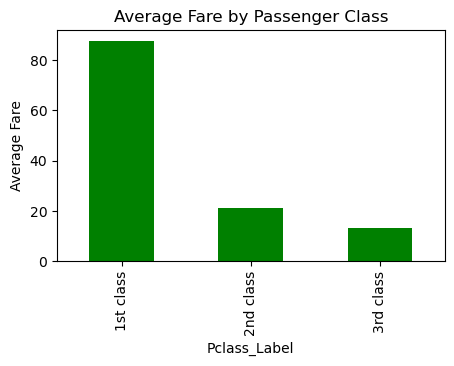

In [164]:
#Average Fare by Passenger Class
df_main_grouped['average_fare'].plot(kind='bar', title='Average Fare by Passenger Class', ylabel='Average Fare', color = ['green'], figsize=(5,3))
plt.show()

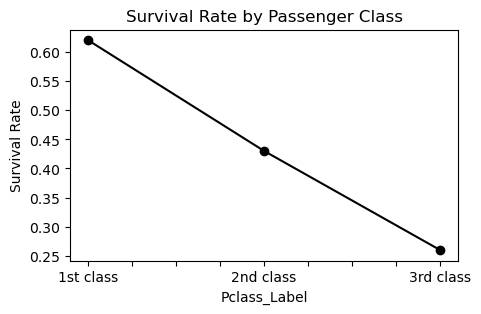

In [165]:
#Survival Rate by Passenger Class
df_main_grouped['survival_rate'].plot(kind='line', title='Survival Rate by Passenger Class', marker='o', ylabel='Survival Rate', color=['black'], figsize=(5,3))
plt.show()

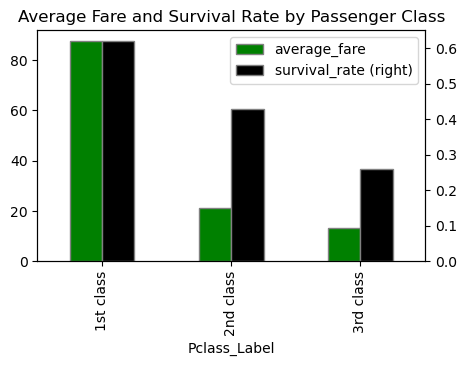

In [166]:
#Average Fare and Survival Rate by Passenger Class
df_main_grouped.plot(kind='bar', secondary_y='survival_rate', title='Average Fare and Survival Rate by Passenger Class', color = ['Green', 'black'], figsize=(5,3), edgecolor = 'gray')
plt.show()

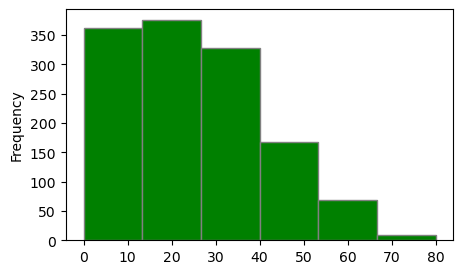

In [167]:
#distribution of age

df_main['age'].plot(kind='hist', bins=6, color = ['Green'], figsize=(5,3), edgecolor = 'gray')
plt.show()